In [83]:
# Initializing


import pandas as pd 

import numpy as np 


%matplotlib inline

import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()

sns.set_style("darkgrid")

# ignore sklearn & seaborn warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 


from scipy import stats
from scipy.stats import norm, skew  #ex. sns(fit = norm)


# Format scientific notation from pandas aggregation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [84]:
df_dummies = pd.read_csv('data/csv_versions/version2/all_data.csv')
df_no_dummies = pd.read_csv('data/csv_versions/version2/all_data_no_dummies.csv') 

In [85]:
targets = pd.read_csv('data/y_train.csv') 

In [86]:
from sklearn.model_selection import GridSearchCV, train_test_split 

from sklearn import linear_model as lm 
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 

from sklearn.metrics import mean_squared_error  

#rms error: 
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))   

### Split all_data into train and test: 

In [113]:
ntrain = targets.shape[0] 
x_d = df_dummies[:ntrain]
x_d_kag_test = df_dummies[ntrain:]
x_nd = df_no_dummies[:ntrain]
x_nd_kag_test = df_no_dummies[ntrain:]
targets_log = targets.apply(np.log)


In [88]:
x_d_kag_test.shape

(1459, 108)

In [89]:
x_nd.Exterior1st.value_counts() 

VinylSd    512
HdBoard    220
MetalSd    219
Wd Sdng    205
Plywood    108
CemntBd     57
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [40]:
x_nd.Neighborhood.value_counts() #NAmes 

NAmes      226
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     74
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     38
IDOTRR      37
Timber      37
ClearCr     28
SWISU       25
StoneBr     22
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [41]:
x_nd.Foundation.value_counts() #CBlock

CBlock    635
PConc     634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [42]:
x_nd.HouseStyle.value_counts() #1Story

1Story    723
2Story    437
1.5Fin    154
SLvl       64
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [43]:
x_nd.LotShape.value_counts() #Reg 

Reg    922
IR1    477
IR2     40
IR3      9
Name: LotShape, dtype: int64

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1448 rows x 0 columns]

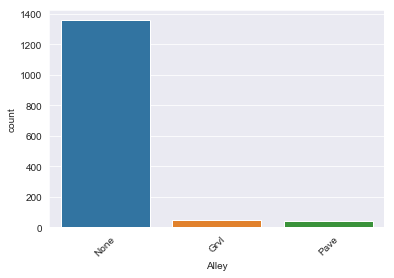

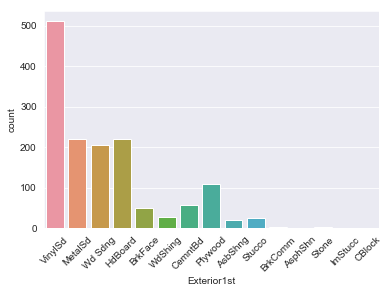

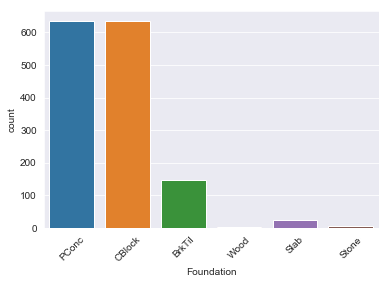

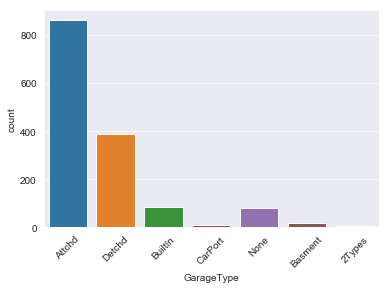

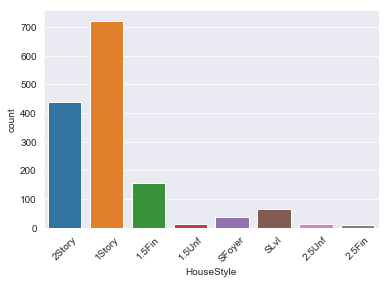

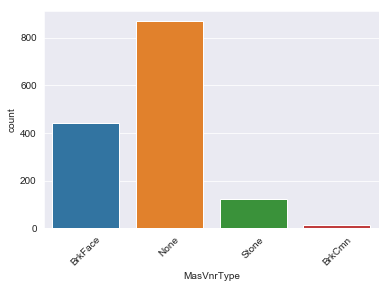

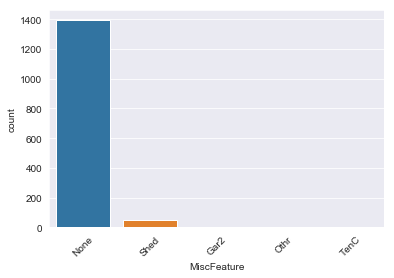

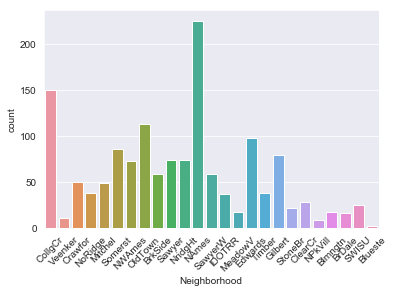

In [98]:
for i, col in enumerate(x_nd.select_dtypes(['object']).columns):
    plt.figure(i)
    ax = sns.countplot(x = col, data = x_nd)
    plt.xticks(rotation=45)
    plt.show() 

In [99]:
#drop dominant columns for dummified variables 

x_d_dom_drop = x_d.drop(['Alley_None', 'Exterior1st_VinylSd', 'Foundation_CBlock', 'GarageType_Attchd',  'HouseStyle_1Story', 'MasVnrType_None', 'MiscFeature_None','Neighborhood_NAmes'], axis = 1)  

In [100]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler.fit(x_d_dom_drop)
x_d_std = scaler.transform(x_d_dom_drop)

x_d_std = pd.DataFrame(x_d_std) 


In [101]:
x_d_kag_dom_drop = x_d_kag_test.drop(['Alley_None', 'Exterior1st_VinylSd', 'Foundation_CBlock', 'GarageType_Attchd','HouseStyle_1Story', 'MasVnrType_None', 'MiscFeature_None','Neighborhood_NAmes'], axis = 1)  

In [102]:
scaler.fit(x_d_kag_dom_drop)
x_d_kag_std = scaler.transform(x_d_kag_dom_drop)

x_d_kag_std = pd.DataFrame(x_d_kag_std)  

### Split x_d_std and targets into train and test using train_test_split: 

In [103]:
x_d_train, x_d_test, y_d_train, y_d_test = train_test_split(x_d_std, targets_log, test_size = 0.2, random_state = 42) 


## MODELLING

### 1. Multiple Linear Regression: 

In [104]:
lm_model =lm.LinearRegression()
lm_model.fit(x_d_train, y_d_train)

#RMS error 
print("RMSE train: {}".format(rmse(y_d_train, lm_model.predict(x_d_train)))) 
print("RMSE test : {}".format(rmse(y_d_test,  lm_model.predict(x_d_test)))) 
print('R^2 score: {}'.format(lm_model.score(x_d_train, y_d_train)))




RMSE train: 0.10866685310392617
RMSE test : 0.15003593259612694
R^2 score: 0.9218379791720993


### 2. Ridge/Lasso/Elastic Net : Penalised LR 

In [171]:
#1. ridge: 

grid_param = [{'alpha': np.linspace(1e-3,1e-2,50)}]

gs = GridSearchCV(estimator=lm.Ridge(random_state=42), param_grid=grid_param, cv=5)

gs.fit(x_d_std, targets_log)

#cv_results_, grid_scores_ (to obsolete), best_estimator_, best_params_, best_score_
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_))
#print('')
model = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_d_train, model.predict(x_d_train))))
print("RMSE test : {}".format(rmse(y_d_test,  model.predict(x_d_test))))
print('R^2 score: {}'.format(model.score(x_d_train, y_d_train))) 

Best params: {'alpha': 0.01}
Best score : 0.8844034339701139
RMSE train: 0.11017850008840399
RMSE test : 0.13913322967876882
R^2 score: 0.9196482555172825


In [166]:
x_d_kag_std.shape

(1459, 65)

### Kaggle Test Submission 1: Predict on test set using Ridge regression

In [172]:
y_pred_ridge = model.predict(x_d_kag_std)  
y_pred_ridge = pd.DataFrame(y_pred_ridge) 
y_pred_ridge[0] = y_pred_ridge[0].apply(lambda x: np.exp(x)) 
y_pred_ridge = y_pred_ridge.reset_index() 
y_pred_ridge.columns = ['Id', 'SalePrice']
y_pred_ridge['Id'] = y_pred_ridge['Id'].apply(lambda x: x + 1461) 
y_pred_ridge.set_index('Id', inplace = True)
y_pred_ridge.to_csv('data/kaggle_ridge_submission3.csv') #0.14729  

In [106]:
#2. Lasso: 

grid_param = [{'alpha': np.linspace(1e-4,1e-2,20)}] 

gs = GridSearchCV(estimator=lm.Lasso(random_state= 42, normalize=False), param_grid=grid_param, cv=5)

gs.fit(x_d_std, targets_log)

#cv_results_, grid_scores_ (to obsolete), best_estimator_, best_params_, best_score_
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_))
#print('')
model = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_d_train, model.predict(x_d_train))))
print("RMSE test : {}".format(rmse(y_d_test,  model.predict(x_d_test)))) 


Best params: {'alpha': 0.0037473684210526316}
Best score : 0.8895540948664006
RMSE train: 0.11468871627696595
RMSE test : 0.1418132982967078


In [107]:
model.fit(x_d_std, targets_log)
print('The intercept is %.4f' %(model.intercept_))
lassoCoef = pd.Series(model.coef_, index=x_d_std.columns)
print('The slopes are \n%s' %(lassoCoef))  

The intercept is 12.0156
The slopes are 
0     0.003
1    -0.005
2     0.028
3    -0.009
4    -0.000
5    -0.001
6    -0.000
7    -0.000
8     0.000
9    -0.002
10    0.017
11    0.006
12    0.007
13    0.002
14   -0.000
15    0.000
16   -0.000
17    0.065
18   -0.016
19    0.088
20   -0.013
21    0.021
22    0.013
23   -0.000
24   -0.000
25    0.010
26    0.006
27    0.098
28    0.000
29    0.001
      ...  
70   -0.000
71    0.000
72   -0.000
73   -0.000
74   -0.000
75   -0.001
76   -0.000
77   -0.000
78   -0.012
79    0.003
80    0.004
81   -0.000
82    0.024
83   -0.004
84    0.000
85   -0.018
86   -0.014
87   -0.002
88   -0.000
89   -0.000
90    0.001
91    0.006
92   -0.011
93    0.000
94   -0.000
95   -0.002
96    0.003
97    0.005
98    0.000
99    0.005
Length: 100, dtype: float64


In [109]:
#3: Elastic Net 

grid_param = [{'alpha': np.linspace(1e-4,1e-2,20), 'l1_ratio': np.linspace(0.015, 1, 20)}]

# Confirmed that setting scoring='neg_mean_squared_error' is the same result as using the default "R2" score.
gs = GridSearchCV(estimator=lm.ElasticNet(random_state=42), param_grid=grid_param, cv=5)

gs.fit(x_d_std, targets_log) 

#cv_results_, grid_scores_ (to obsolete), best_estimator_, best_params_, best_score_
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_)) 
#print('')
model = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_d_train, model.predict(x_d_train))))
print("RMSE test : {}".format(rmse(y_d_test, model.predict(x_d_test))))  

Best params: {'alpha': 0.01, 'l1_ratio': 0.32605263157894737}
Best score : 0.8897453460198561
RMSE train: 0.1140439928485666
RMSE test : 0.1413681977739366


In [115]:
#proportion of coeffs > 1e-6 out of all coeffs 

sum(model.coef_ > 1e-6) / model.coef_.shape[0]   

0.32

Preparation for tree-based models: encode nominal categorical variables in x_nd df: 

In [111]:
x_nd.columns

Index(['Unnamed: 0', 'ExterQual', 'Exterior1st', 'Fireplaces', 'Foundation', 'GarageArea', 'GrLivArea', 'HeatingQC', 'HouseStyle', 'KitchenQual', 'LotShape', 'Neighborhood', 'OverallQual', 'TotRmsAbvGrd', 'Num_Bathrooms', 'HouseSF', 'YearRemodAgg'], dtype='object')

In [114]:
#drop first column, and determine which columns are nominal categorical 

x_nd = x_nd.drop('Unnamed: 0', axis = 1)
x_nd.select_dtypes(['object']) 

ValueError: labels ['Unnamed: 0'] not contained in axis

In [119]:
from sklearn.preprocessing import LabelEncoder

['Alley_None', 'Exterior1st_VinylSd', 'Foundation_CBlock', 'GarageType_Attchd',  'HouseStyle_1Story', 'MasVnrType_None', 'MiscFeature_None','Neighborhood_NAmes'], axis = 1)  

In [132]:
#use LabelEncode to encode categorical vars 

lencoder = LabelEncoder()

alley_labels = lencoder.fit_transform(x_nd.Alley).reshape((-1,1))
exterior1st_labels  =lencoder.fit_transform(x_nd.Exterior1st).reshape((-1,1))
foundation_labels = lencoder.fit_transform(x_nd.Foundation).reshape((-1,1))  
garagetype_labels = lencoder.fit_transform(x_nd.GarageType).reshape((-1,1))
housestyle_labels    = lencoder.fit_transform(x_nd.HouseStyle).reshape((-1,1))
lotshape_labels   = lencoder.fit_transform(x_nd.LotShape).reshape((-1,1))
masvnrtype_labels = lencoder.fit_transform(x_nd.MasVnrType).reshape((-1,1))
miscfeature_labels = lencoder.fit_transform(x_nd.MiscFeature).reshape((-1,1))
neighborhood_labels= lencoder.fit_transform(x_nd.Neighborhood).reshape((-1,1)) 

x_nd_le = [alley_labels, exterior1st_labels, foundation_labels, garagetype_labels, housestyle_labels, lotshape_labels, masvnrtype_labels, miscfeature_labels, neighborhood_labels] 

In [133]:
#create list numerical + encoded nominal categorical features 

num_cols = x_nd.select_dtypes(exclude = ['object']).columns 

for col in num_cols: 
    x_nd_le.append(x_nd[col].reshape((-1, 1))) 


In [134]:
x_nd_le

[array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]), array([[12],
        [ 8],
        [12],
        ...,
        [ 5],
        [ 8],
        [ 6]]), array([[2],
        [1],
        [2],
        ...,
        [4],
        [1],
        [1]]), array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]), array([[5],
        [2],
        [5],
        ...,
        [5],
        [2],
        [2]]), array([[  0],
        [477],
        [478],
        ...,
        [966],
        [967],
        [968]]), array([[1],
        [2],
        [1],
        ...,
        [2],
        [2],
        [2]]), array([[1],
        [1],
        [1],
        ...,
        [3],
        [1],
        [1]]), array([[ 5],
        [24],
        [ 5],
        ...,
        [ 6],
        [12],
        [ 7]]), array([[4],
        [4],
        [4],
        ...,
        [1],
        [4],
        [4]]), array([[3],
        [1],
        [2],
        ...,
    

In [156]:
#concatenate features (including encoded nominal categorical variables)-> new dataframe 


x_nd_le = pd.DataFrame(x_nd_le)  
x_nd_le.shape

x_nd_le.columns = ['alley', 'exterior1st', 'foundation', 'garagetype', 'housestyle', 'lotshape', 'masvnrtype', 'miscfeature', 'neighborhood'] + list(num_cols)  

In [157]:
x_nd_le.head()

alley  exterior1st  foundation  garagetype  housestyle  lotshape  masvnrtype  miscfeature  neighborhood  BsmtCond  BsmtExposure  BsmtFinSF1  BsmtFinType1  BsmtFinType2  BsmtQual  BsmtUnfSF  ExterQual  Fence  FireplaceQu  Fireplaces  GarageArea  GarageCars  GarageCond  GarageFinish  GarageQual  GarageYrBlt  GrLivArea  HeatingQC  HouseSF  KitchenQual   LotArea  LotFrontage  LotShape  MiscVal  Num_Bathrooms  OpenPorchSF  OverallQual  PoolArea  PoolQC  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  YearRemodAgg
0  1.000       12.000       2.000       1.000       5.000     0.000       1.000        1.000         5.000     4.000         3.000     706.000         2.000         6.000     2.000    150.000      2.000  4.000        3.000       0.000     548.000       2.000       5.000         2.000       5.000     2003.000   1710.000      0.000 3114.000        2.000  8450.000       65.000     0.000    0.000          3.500       61.000        6.000     0.000   3.000        0.000         8.000      856.000       0.000      2003.000
1  1.000        8.000       1.000       1.000       2.000   477.000       2.000        1.000        24.000     4.000         1.000     978.000         0.000         6.000     2.000    284.000      3.000  4.000        5.000       1.000     460.000       2.000       5.000         2.000       5.000     1976.000   1262.000      0.000 2984.000        3.000  9600.000       80.000  1931.000    0.000          2.500        0.000        5.000     0.000   3.000        0.000         6.000     1262.000     298.000      1976.000
2  1.000       12.000       2.000       1.000       5.000   478.000       1.000        1.000         5.000     4.000         2.000     486.000         2.000         6.000     2.000    434.000      2.000  4.000        5.000       1.000     608.000       2.000       5.000         2.000       5.000     2001.000   1786.000      0.000 3314.000        2.000 11250.000       68.000  1932.000    0.000          3.500       42.000        6.000     0.000   3.000        0.000         6.000      920.000       0.000      2001.500
3  1.000       13.000       0.000       5.000       5.000   479.000       2.000        1.000         6.000     1.000         3.000     216.000         0.000         6.000     4.000    540.000      3.000  4.000        2.000       1.000     642.000       3.000       5.000         3.000       5.000     1998.000   1717.000      2.000 3115.000        2.000  9550.000       60.000  1933.000    0.000          2.000       35.000        6.000     0.000   3.000        0.000         7.000      756.000       0.000      1942.500
4  1.000       12.000       2.000       1.000       5.000   480.000       1.000        1.000        15.000     4.000         0.000     655.000         2.000         6.000     2.000    490.000      2.000  4.000        5.000       1.000     836.000       3.000       5.000         2.000       5.000     2000.000   2198.000      0.000 4179.000        2.000 14260.000       84.000  1934.000    0.000          3.500       84.000        7.000     0.000   3.000        0.000         9.000     1145.000     192.000      2000.000

In [159]:
#train_test split of non-dummified dataframe 

x_nd_train, x_nd_test, y_nd_train, y_nd_test = train_test_split(x_nd_le, targets_log, test_size = 0.2, random_state = 42)  


### 3. Random Forest 

In [120]:

#test random forest regressor with default parameters: 

randomForest = RandomForestRegressor()

# fit RF model on training set
randomForest.set_params(random_state=42)

randomForest.fit(x_nd_train, y_nd_train)  

print("The training error is: %.5f" % (1- randomForest.score(x_nd_train, y_nd_train))) 
print("The test     error is: %.5f" % (1 - randomForest.score(x_nd_test, y_nd_test)))   

The training error is: 0.04859
The test     error is: 0.28646


In [121]:
grid_para_forest = {
    'n_estimators': range(80, 200, 10),
    'max_depth': range(3,12),
    'max_features': ['sqrt', 'auto']
}  

In [122]:
gs = GridSearchCV(estimator = RandomForestRegressor(\
                                    min_samples_split=5,\
                                    #max_depth = 10,\
                                    min_samples_leaf=1,\
                                    random_state=42,\
                                    n_jobs=-1),\
                  param_grid = grid_para_forest, n_jobs=-1, cv=5)   

In [123]:
gs.fit(x_nd_train, y_nd_train)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
          

In [298]:
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_))   

Best params: {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 90}
Best score : 0.7694308012689799


In [124]:
forest_final = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_d_train, forest_final.predict(x_nd_train)))) #0.1044
print("RMSE test : {}".format(rmse(y_d_test,  forest_final.predict(x_nd_test)))) #0.1962  

RMSE train: 0.1370776203002676
RMSE test : 0.19620686829323788


In [125]:

forest_feature_importance = forest_final.feature_importances_

forest_sorted_features = sorted(list(zip(x_nd_le.columns, forest_feature_importance)), key = lambda kv: kv[1], reverse = True) 

forest_sorted_features 

[('housesf', 0.4007116462865751),
 ('overallqual', 0.2153847488979508),
 ('year_remod_agg', 0.14127826204855218),
 ('kitchenqual', 0.11586024082597046),
 ('num_bathrooms', 0.08905445677203017),
 ('neighborhood', 0.03771064516892126)]

Text(0.5,1,'Feature Importance: Random Forest')

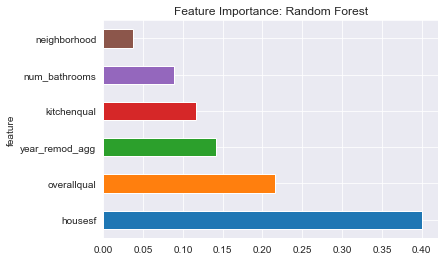

In [126]:
#graph feature importances of top 25 features 

a, b = zip(*forest_sorted_features)
importance_score = pd.DataFrame({'feature':a, 'score':b})
importance_score.plot.barh(x='feature', y='score', legend=None)
plt.title('Feature Importance: Random Forest')

### 4. GBM

In [160]:
gbm = GradientBoostingRegressor()  

In [161]:
gbm_1 = gbm.fit(x_nd_train, y_nd_train) 

print("The training error is: %.5f" % (1- gbm.score(x_nd_train, y_nd_train))) 
print("The test     error is: %.5f" % (1 - gbm.score(x_nd_test, y_nd_test)))   

The training error is: 0.04486
The test     error is: 0.16254


In [162]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)

gbm.set_params(learning_rate = 1, n_estimators=n_estimators, max_depth=3)
gbm.fit(x_nd_train, y_nd_train)
gen = gbm.staged_predict(x_nd_train)
r2_rate1 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate1.append(r2_score(predicted_targets, y_nd_train))    

In [186]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)

gbm.set_params(learning_rate = 0.1, n_estimators=n_estimators, max_depth=3)
gbm.fit(x_nd_train, y_nd_train)
gen = gbm.staged_predict(x_nd_train)
r2_rate01 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate01.append(r2_score(predicted_targets, y_nd_train))    

In [130]:
from sklearn.metrics import r2_score 
n_estimators = 50100
steps = range(100, 50100, 1000)

gbm.set_params(learning_rate = 0.01, n_estimators=n_estimators, max_depth=3)
gbm.fit(x_nd_train, y_nd_train)
gen = gbm.staged_predict(x_nd_train)
r2_rate001 = []
for n in range(n_estimators):
           predicted_targets = next(gen)
           if n not in steps: continue
           r2_rate001.append(r2_score(predicted_targets, y_nd_train))    

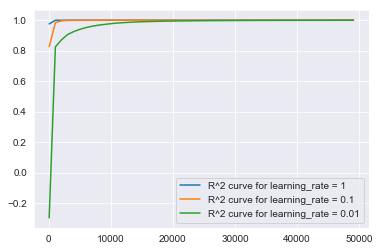

In [188]:
plt.plot(steps, r2_rate1,  label=r'R^2 curve for learning_rate = 1')
plt.plot(steps, r2_rate01, label=r'R^2 curve for learning_rate = 0.1')
plt.plot(steps, r2_rate001, label=r'R^2 curve for learning_rate = 0.01')
plt.legend(loc=4) 

In [163]:
n_estimators = 3000
gbm.set_params(learning_rate=0.005, max_depth=5, max_features = 'sqrt', subsample = 0.9,  n_estimators=n_estimators, min_samples_split=7,
min_samples_leaf=10)

train_r2 = []
test_r2  = []
steps = range(100, 3000, 100)

gbm.fit(x_nd_train,y_nd_train)
gen_train = gbm.staged_predict(x_nd_train) #generators 
gen_test  = gbm.staged_predict(x_nd_test)

for n in range(n_estimators):
           predicted_train = next(gen_train)
           predicted_test  = next(gen_test)
           if n not in steps: continue
           train_r2.append(r2_score(predicted_train, y_nd_train))
           test_r2.append(r2_score(predicted_test, y_nd_test))        

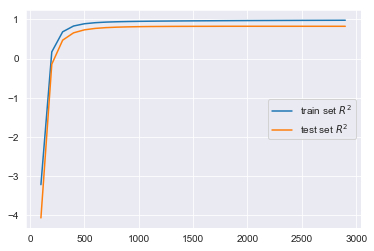

In [164]:
plt.plot(steps, train_r2, label='train set $R^2$')
plt.plot(steps, test_r2, label='test set $R^2$')
plt.legend(loc=7) 

In [165]:
print(max(train_r2),max(test_r2))

0.9771652735301178 0.8234946740125555


In [166]:
print("RMSE train: {}".format(rmse(y_nd_train, gbm.predict(x_nd_train))))
print("RMSE test : {}".format(rmse(y_nd_test,  gbm.predict(x_nd_test)))) 

RMSE train: 0.05612131846281633
RMSE test : 0.14816586777211746


In [167]:
gbm_feature_importance = gbm.feature_importances_

gbm_sorted_features = sorted(list(zip(x_nd_le.columns, gbm_feature_importance)), key = lambda kv: kv[1], reverse = True) 

gbm_sorted_features 

[('HouseSF', 0.16584702844887406),
 ('OverallQual', 0.1278866390432387),
 ('GrLivArea', 0.10303728598077834),
 ('YearRemodAgg', 0.08184529646065339),
 ('Num_Bathrooms', 0.06539863334068673),
 ('GarageCars', 0.06352393899122707),
 ('ExterQual', 0.03972571318243926),
 ('TotalBsmtSF', 0.03826170541526372),
 ('GarageArea', 0.03688626424981316),
 ('KitchenQual', 0.027341398255800564),
 ('Fireplaces', 0.027008866026645394),
 ('garagetype', 0.026215949677309097),
 ('GarageYrBlt', 0.02507527816287693),
 ('LotArea', 0.023744351010769143),
 ('BsmtFinSF1', 0.020184377756091113),
 ('BsmtQual', 0.01609024341658191),
 ('TotRmsAbvGrd', 0.011639137893282935),
 ('LotFrontage', 0.009900711134617044),
 ('neighborhood', 0.00846979075114872),
 ('OpenPorchSF', 0.008312219875467932),
 ('HeatingQC', 0.0080448059134478),
 ('BsmtUnfSF', 0.007416106393345893),
 ('GarageFinish', 0.006823002937245283),
 ('foundation', 0.00661599863335808),
 ('WoodDeckSF', 0.005742130657718649),
 ('BsmtFinType1', 0.0046247055257129

In [304]:
grid_para_gbm = {
    'max_depth': range(3,10),
    'max_features': ['sqrt', 'auto'], 
    'min_samples_split':range(3,21,3), 
    'min_samples_leaf': np.arange(1,10,1),
    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9], 
    'learning_rate': [0.005, 0.01, 0.05, 0.1]   
}  

In [305]:
gs = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 500), param_grid = grid_para_gbm, n_jobs = -1, cv = 5)   

In [306]:
gs.fit(x_nd_train, y_nd_train) 

KeyboardInterrupt: 

In [ ]:
print('Best params: {}'.format(gs.best_params_))
print('Best score : {}'.format(gs.best_score_))
print('')
model = gs.best_estimator_
print("RMSE train: {}".format(rmse(y_nd_train, model.predict(x_nd_train))))
print("RMSE test : {}".format(rmse(y_nd_test,  model.predict(x_nd_test))))

### 5. SVR

In [168]:
from sklearn.svm import SVR 

In [169]:
svr = SVR()
svr.set_params(kernel='rbf') 

paramDict = {'C': np.linspace(1, 100, 20), 'gamma': np.linspace(1e-4, 1e-2, 10)}
svr_grid = GridSearchCV(svr, paramDict, cv=5, return_train_score = True)
svr_grid.fit(x_d_train, y_d_train) 



KeyboardInterrupt: 

In [329]:
svr_grid.best_params_ 
svr_grid.best_score_

0.4215911969172941

In [330]:
svr_best = svr_grid.best_estimator_
svr_best.fit(x_d_train,y_d_train)
svr_best.score(x_d_train, y_d_train)

0.8974298508940413

In [331]:
print("RMSE train: {}".format(rmse(y_d_train, svr_best.predict(x_d_train))))
print("RMSE test : {}".format(rmse(y_d_test, svr_best.predict(x_d_test))))

RMSE train: 0.12379148817191436
RMSE test : 0.2949315596484075


### 6. Stacking: 

### Stack base models: 

In [173]:
from mlxtend.regressor import StackingRegressor




In [174]:
models = [
    # linear model
 
    #lm.ElasticNet(alpha = 0.01, l1_ratio = 0.32605263157894737, random_state=42),
    
    lm.Ridge(alpha = 0.01, random_state = 42), 
 
     #conservative random forest model
    RandomForestRegressor(\
                        max_depth=5,\
                        max_features='sqrt',\
                        n_estimators=1000,\
                        random_state=42,\
                        n_jobs=-1),
    
#     RandomForestRegressor(\
#                         max_features= 8,\
#                         n_estimators=200,\
#                         min_samples_split=5,\
#                         min_samples_leaf=1,\
#                         random_state= 42,\
#                         n_jobs=-1),
#     RandomForestRegressor(\
#                         max_depth=None,\
#                         max_features=8,\
#                         n_estimators=170,\
#                         random_state=42,\
#                         n_jobs=-1),
    
    #conservative gbm model
    GradientBoostingRegressor(\
                        learning_rate=0.005,\
                        n_estimators=3000,\
                        max_depth=2,\
                        min_samples_split=40,\
                        min_samples_leaf=10,\
                        max_features= 10,\
                        subsample=0.8,\
                        random_state=42),
    
#     GradientBoostingRegressor(\
#                         learning_rate=0.005,\
#                         n_estimators=3000,\
#                         max_depth=5,\
#                         min_samples_split=7,\
#                         min_samples_leaf=1,\
#                         max_features='sqrt',\
#                         subsample=0.8,\
#                         random_state= 42)
    
#     GradientBoostingRegressor(\
#                         learning_rate=0.01,\
#                         n_estimators=2000,\
#                         max_depth=5,\
#                         min_samples_split=28,\
#                         min_samples_leaf=3,\
#                         max_features=63,\
#                         subsample=0.8,\
#                         random_state=rs_const)
    ]

meta_model = lm.LinearRegression(normalize=False) 

In [175]:
stack_reg = StackingRegressor(regressors= models, 
                           meta_regressor=meta_model)  

In [176]:

stack_reg.fit(x_d_train, y_d_train)
stack_reg.predict(x_d_train)   

array([[11.6088022 ],
       [11.70714036],
       [11.85709564],
       ...,
       [12.16145964],
       [12.44146208],
       [12.05585095]])

In [177]:
print("RMSE train: {}".format(rmse(y_d_train, stack_reg.predict(x_d_train))))
print("RMSE test: {}".format(rmse(y_d_test, stack_reg.predict(x_d_test)))) 

# train: 0.113
#test: 0.14606 

RMSE train: 0.10056472396729445
RMSE test: 0.14606130360005892


In [48]:
y_pred_stack = stack_reg.predict(x_d_kag_std)  
y_pred_stack = pd.DataFrame(y_pred_stack) 
y_pred_stack[0] = y_pred_stack[0].apply(lambda x: np.exp(x)) 
y_pred_stack = y_pred_stack.reset_index() 
y_pred_stack.columns = ['Id', 'SalePrice']
y_pred_stack['Id'] = y_pred_stack['Id'].apply(lambda x: x + 1461) 
y_pred_stack.set_index('Id', inplace = True)
y_pred_stack.to_csv('data/kaggle_ridge_submission2.csv') 